# Hotdog-OR-Not-Hotdog

<br>

<img src='https://miro.medium.com/max/650/1*ubJ-RF8CKGvjckDEICsxsQ.png'>

<br>

<blockquote style='text-align: left;'>"What would you say if I told you there is a app on the market that tell you if you have a hotdog or not a hotdog?"  -Jian-YangNot-Hot-Dog</blockquote>
 
<br>

This is a deep learning model code to train a model to classify hot dog images from not hot dog image based on the populer TV series silicon valley scence.
watch freom here: https://www.youtube.com/watch?v=pqTntG1RXSY&feature=youtu.be

<br>

## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

## Load data

In [2]:
image_width, image_height = 150, 150

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      width_shift_range=0.4,
      height_shift_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = train_datagen.flow_from_directory(
                    "../dataset/train/",
                    batch_size=128,
                    class_mode='binary',
                    shuffle=True,
                    target_size=(image_width, image_height)
)     

test_generator =  test_datagen.flow_from_directory(
                    "../dataset/test/",
                    batch_size=128,
                    class_mode='binary',
                    shuffle=True,
                    target_size=(image_width, image_height)
)

Found 2000 images belonging to 2 classes.
Found 785 images belonging to 2 classes.


In [3]:
train_steps = train_generator.n // train_generator.batch_size
test_steps = test_generator.n // test_generator.batch_size
print(train_steps)
print(test_steps)

15
6


## Define a Model

In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(image_width, image_width, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0

In [6]:
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

## Train model

In [7]:
checkpointer = ModelCheckpoint(filepath='custom_model.h5', verbose=1, save_best_only=True)

In [8]:
history = model.fit(
        train_generator,
        steps_per_epoch=train_steps,
        epochs=100,
        validation_data=test_generator,
        validation_steps=test_steps,
        verbose=1,
        callbacks=[checkpointer])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 6 steps
Epoch 1/100
14/15 [===========================>..] - ETA: 0s - loss: 1.0315 - accuracy: 0.5926
Epoch 00001: val_loss improved from inf to 0.83398, saving model to custom_model.h5
15/15 [==============================] - 15s 1s/step - loss: 1.0105 - accuracy: 0.5917 - val_loss: 0.8340 - val_accuracy: 0.4531
Epoch 2/100
14/15 [===========================>..] - ETA: 0s - loss: 0.6949 - accuracy: 0.5803
Epoch 00002: val_loss improved from 0.83398 to 0.75014, saving model to custom_model.h5
15/15 [==============================] - 14s 942ms/step - loss: 0.6918 - accuracy: 0.5817 - val_loss: 0.7501 - val_accuracy: 0.4544
Epoch 3/100
14/15 [===========================>..] - ETA: 0s - loss: 0.6733 - accuracy: 0.6193
Epoch 00003: val_loss improved from 0.75014 to 0.67359, saving model to custom_model.h5
15/15 [==============================] - 14s 903ms/step - loss: 0.6723 - accuracy: 0.6170 - val_loss: 0

Epoch 29/100
14/15 [===========================>..] - ETA: 0s - loss: 0.5073 - accuracy: 0.7545
Epoch 00029: val_loss did not improve from 0.60369
15/15 [==============================] - 11s 735ms/step - loss: 0.5119 - accuracy: 0.7536 - val_loss: 0.7913 - val_accuracy: 0.6120
Epoch 30/100
14/15 [===========================>..] - ETA: 0s - loss: 0.5034 - accuracy: 0.7666
Epoch 00030: val_loss did not improve from 0.60369
15/15 [==============================] - 11s 722ms/step - loss: 0.4996 - accuracy: 0.7676 - val_loss: 0.7883 - val_accuracy: 0.6263
Epoch 31/100
14/15 [===========================>..] - ETA: 0s - loss: 0.5203 - accuracy: 0.7483
Epoch 00031: val_loss did not improve from 0.60369
15/15 [==============================] - 11s 716ms/step - loss: 0.5187 - accuracy: 0.7500 - val_loss: 0.7213 - val_accuracy: 0.6497
Epoch 32/100
14/15 [===========================>..] - ETA: 0s - loss: 0.5139 - accuracy: 0.7529
Epoch 00032: val_loss did not improve from 0.60369
15/15 [=========

Epoch 58/100
14/15 [===========================>..] - ETA: 0s - loss: 0.4547 - accuracy: 0.7856
Epoch 00058: val_loss did not improve from 0.50823
15/15 [==============================] - 11s 723ms/step - loss: 0.4579 - accuracy: 0.7826 - val_loss: 0.8317 - val_accuracy: 0.6589
Epoch 59/100
14/15 [===========================>..] - ETA: 0s - loss: 0.4540 - accuracy: 0.7741
Epoch 00059: val_loss did not improve from 0.50823
15/15 [==============================] - 11s 726ms/step - loss: 0.4592 - accuracy: 0.7703 - val_loss: 0.7446 - val_accuracy: 0.6549
Epoch 60/100
14/15 [===========================>..] - ETA: 0s - loss: 0.4739 - accuracy: 0.7672
Epoch 00060: val_loss did not improve from 0.50823
15/15 [==============================] - 11s 722ms/step - loss: 0.4760 - accuracy: 0.7671 - val_loss: 0.9421 - val_accuracy: 0.6159
Epoch 61/100
14/15 [===========================>..] - ETA: 0s - loss: 0.4806 - accuracy: 0.7683
Epoch 00061: val_loss did not improve from 0.50823
15/15 [=========

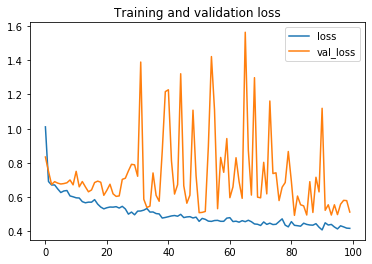

In [9]:
import matplotlib.pyplot as plt

loss     = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.title('Training and validation loss')
plt.legend()

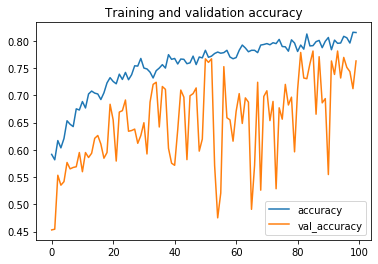

In [10]:
accuracy      = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val_accuracy')
plt.title('Training and validation accuracy')
plt.legend()

In [11]:
model.evaluate(test_generator, verbose=1, steps=test_steps)

  ...
    to  
  ['...']
6/6 [==============================] - 1s 190ms/step - loss: 0.5119 - accuracy: 0.7630


[0.5119442393382391, 0.7630208]

In [12]:
model.save('custom_model.h5')